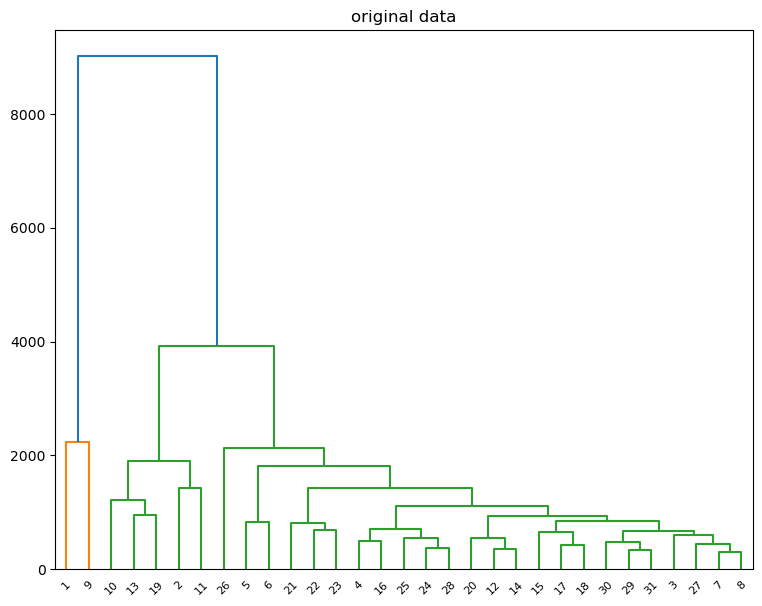

[[6.00000000e+00 7.00000000e+00 2.93106636e+02 2.00000000e+00]
 [2.80000000e+01 3.00000000e+01 3.31470044e+02 2.00000000e+00]
 [1.10000000e+01 1.30000000e+01 3.61216500e+02 2.00000000e+00]
 [2.30000000e+01 2.70000000e+01 3.66069816e+02 2.00000000e+00]
 [1.60000000e+01 1.70000000e+01 4.31542663e+02 2.00000000e+00]
 [2.60000000e+01 3.10000000e+01 4.47439628e+02 3.00000000e+00]
 [2.90000000e+01 3.20000000e+01 4.76778526e+02 3.00000000e+00]
 [3.00000000e+00 1.50000000e+01 4.96872690e+02 2.00000000e+00]
 [2.40000000e+01 3.40000000e+01 5.42650566e+02 3.00000000e+00]
 [1.90000000e+01 3.30000000e+01 5.49286963e+02 3.00000000e+00]
 [2.00000000e+00 3.60000000e+01 6.03067227e+02 4.00000000e+00]
 [1.40000000e+01 3.50000000e+01 6.48566601e+02 3.00000000e+00]
 [3.70000000e+01 4.10000000e+01 6.63030299e+02 7.00000000e+00]
 [2.10000000e+01 2.20000000e+01 6.80116865e+02 2.00000000e+00]
 [3.80000000e+01 3.90000000e+01 7.12199151e+02 5.00000000e+00]
 [2.00000000e+01 4.40000000e+01 8.06367498e+02 3.000000

In [2]:
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


data = pd.read_excel('data/data2015.xlsx',)
# data.pop('RuralWater')
# data.pop('CellPhone')
# data.pop('LifeExp')
data = data.iloc[:,1:]
country = list(data['number'])
#data.pop('地区')

# 以下代码为仅使用层次聚类

plt.figure(figsize=(9, 7))
plt.title("original data")
mergings = linkage(data, method='average')
# print(mergings)
dendrogram(mergings, labels=country, leaf_rotation=45, leaf_font_size=8)
plt.show()
Z = linkage(data, method='average')
print(Z)
cluster_assignments = fcluster(Z, t=3.0, criterion='maxclust')
print(cluster_assignments)
for i in range(1, 4):
    print('cluster', i, ':')
    num = 1
    for index, value in enumerate(cluster_assignments):
        if value == i:
            if num % 5 == 0:
                print()
            num += 1
            print(country[index], end='  ')
    print()

# 以下代码为加入PCA进行对比
class myPCA():

    def __init__(self, X, d=2):
        self.X = X
        self.d = d

    def mean_center(self, data):
        """
        去中心化
        :param data: data sets
        :return:
        """
        n, m = data.shape
        for i in range(m):
            aver = np.sum(self.X[:, i])/n
            x = np.tile(aver, (1, n))
            self.X[:, i] = self.X[:, i]-x

    def runPCA(self):

        # 计算协方差矩阵，得到特征值，特征向量
        S = np.dot(self.X.T, self.X)
        S_val, S_victors = np.linalg.eig(S)
        index = np.argsort(-S_val)[0:self.d]
        Y = S_victors[:, index]
        # 得到输出样本集
        Y = np.dot(self.X, Y)
        return Y

# data_for_pca = np.array(data)
# pcaObject=myPCA(data_for_pca,d=2)
# pcaObject.mean_center(data_for_pca)
# res=pcaObject.runPCA()

# plt.figure(figsize=(9, 7))
# plt.title("after pca")
# mergings = linkage(res,method='average')
# print(mergings)
# dendrogram(mergings,labels=country,leaf_rotation=45,leaf_font_size=8)
# plt.show()
# Z = linkage(res, method='average')
# print(Z)
# cluster_assignments = fcluster(Z, t=3.0, criterion='maxclust')
# print(cluster_assignments)
# for i in range(1,4):
#     print('cluster', i, ':')
#     num = 1
#     for index, value in enumerate(cluster_assignments):
#         if value == i:
#             if num % 5 ==0:
#                 print()
#             num+=1
#             print(country[index],end='  ')
#     print()